In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("Flight_Fare.xlsx")

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
## EDA

***EDA***

---

In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
# df['Price'].plot(kind='line', figsize=(8, 4), title='Price')
# plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# from matplotlib import pyplot as plt
# df['Price'].plot(kind='hist', bins=20, title='Price')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
duplicate = df[df.duplicated()]
print(duplicate)

           Airline Date_of_Journey    Source Destination  \
683    Jet Airways       1/06/2019     Delhi      Cochin   
1061     Air India      21/05/2019     Delhi      Cochin   
1348     Air India      18/05/2019     Delhi      Cochin   
1418   Jet Airways       6/06/2019     Delhi      Cochin   
1674        IndiGo      24/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10594  Jet Airways      27/06/2019     Delhi      Cochin   
10616  Jet Airways       1/06/2019     Delhi      Cochin   
10634  Jet Airways       6/06/2019     Delhi      Cochin   
10672  Jet Airways      27/06/2019     Delhi      Cochin   
10673  Jet Airways      27/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
683    DEL → NAG → BOM → COK    14:35  04:25 02 Jun  13h 50m     2 stops   
1061   DEL → GOI → BOM → COK    22:00  19:15 22 May  21h 15m     2 stops   
1348   DEL → HYD → BOM → COK    17:15  19:15 19 May

Here 220 duplicates are available in this dataframe. But we cannot consider these entries as duplicates because all entries have different dates. It's showing duplicated becuase all the entries have same data irrespective of date.

In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1
OUTLIERS = df[(df['Price'] < Q1 - 1.5 * IQR) | (df['Price'] > Q3 - 1.5 * IQR)]

In [ ]:
print(OUTLIERS)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun

In [ ]:
OUTLIERS.count()

,0
Airline,10682
Date_of_Journey,10682
Source,10682
Destination,10682
Route,10682
Dep_Time,10682
Arrival_Time,10682
Duration,10682
Total_Stops,10682
Additional_Info,10682


<h1> Task-01</h1>

***<h2> Complete Data Analysis Report </h2>***

---

In [ ]:
print("shape of data:",df.shape)
print("missing values:\n",df.isnull().sum())
print("Duplicates:",df.duplicated().sum())

shape of data: (10682, 11)
missing values:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64
Duplicates: 220


Here 220 duplicates are available in this dataframe. But we cannot consider these entries as duplicates because all entries have different dates. It's showing duplicated becuase all the entries have same data irrespective of date.

In [ ]:
print(df.describe(include='all'))

            Airline Date_of_Journey Source Destination            Route  \
count         10682           10682  10682       10682            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4536        4536             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10682        10682  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


date of journey should be date not an object so, we converted into date using pandas pd.to_datetime function.

In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


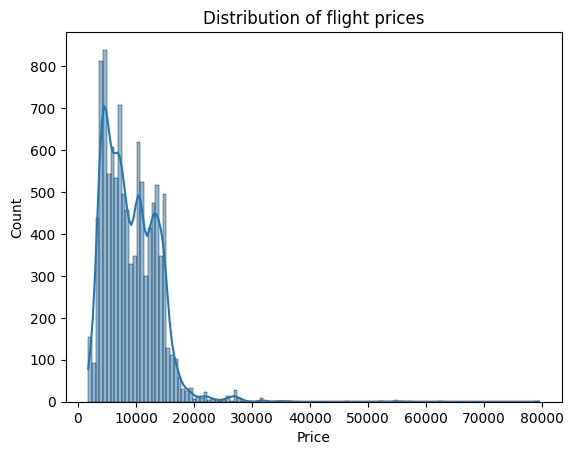

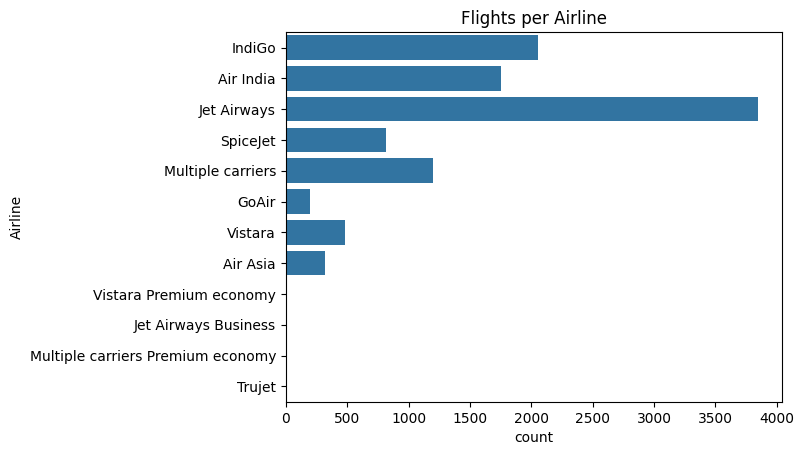

In [ ]:
# price distribution

sns.histplot(df['Price'],kde = True)
plt.title("Distribution of flight prices")
plt.show()

# Airline counts

sns.countplot(y='Airline',data=df)
plt.title('Flights per Airline')
plt.show()

In [ ]:
mean =df['Price'].mean()
std = df['Price'].std()

max_value = mean + 3* std
print(max_value)

min_value = mean - 3* std
print(min_value)

22921.860996843574
-4747.431863722435


Here we draw a histogram where we want to see the skewness of the data. From the above diagram we can see that the data is in the form of **positive right skew**, it means that **price can be affected by the other factors** and majority of the flight prices are lie between max_value and min_value and other can be considered as outliers but we can't cap them or we can't apply other techniques to handle outliers because these are prices which was happend due to some circumtances in the past. If we remove those outliers then might be a chance where our ML model faces deficulty to findout pattern between prices.

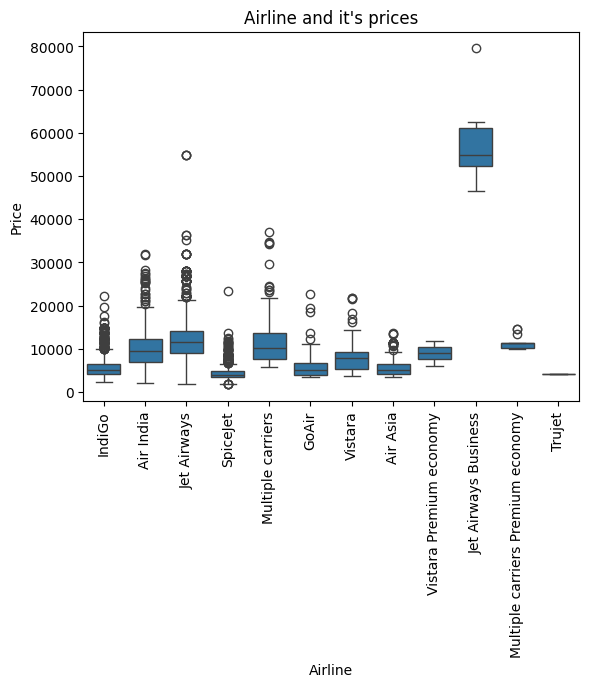

In [ ]:
# Airline vs prices

sns.boxplot(x = 'Airline', y = 'Price',data = df)
plt.title("Airline and it's prices")
plt.xticks(rotation = 90)
plt.show()



**Boxplot**

These above boxplot shows the prices of the airlines. Many of them contains outliers but those are exceptional prices due to some events. All airlines ticket prices are between 3k to 25k but jet airways bussiness have the price range of their tickets between 45k to 65k. jet airways have highest flight prices and spicejet have lowest prices among them.



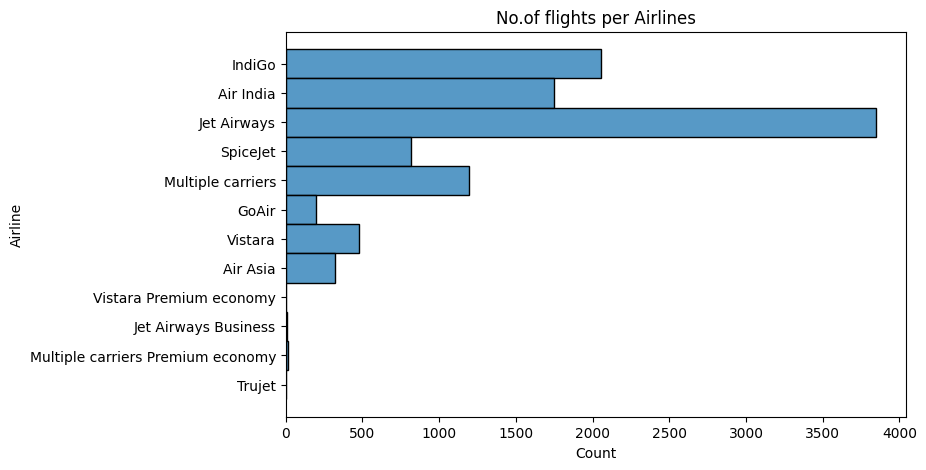

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(y='Airline',data = df)
plt.title("No.of flights per Airlines")
plt.show()

The above figure shows the no.of flights per airlines. Where Jet Airways have the maximum flights which are in the range of 3.5k to 4k and vistara premium economy, Jet Airways Business, Multiple carriers premium economy and Trujet are have lowest flights which are in the range of 0 to 0.5k.

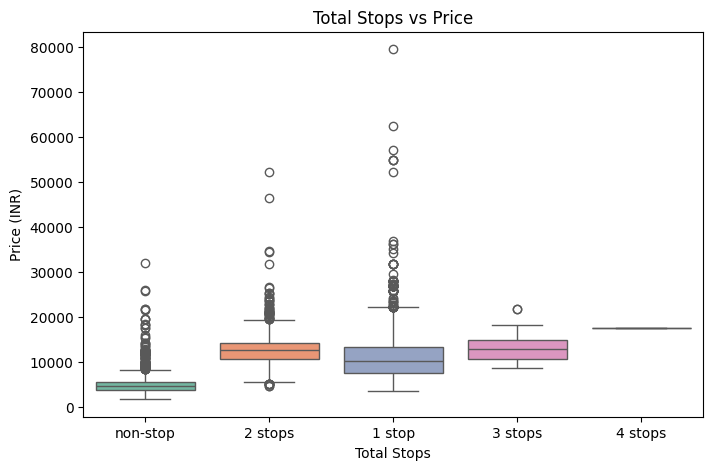

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Stops', y='Price', data=df, palette='Set2',hue='Total_Stops')
plt.title('Total Stops vs Price')
plt.xlabel('Total Stops')
plt.ylabel('Price (INR)')
plt.show()

This boxplot show the relation between the prices and no.of stops per flight. Whether stops affects the price or not. From the figure we can say that stops are not affecting prices because flights which have 3 stops also they are charging between 10k to 20k and where as those have non-stops they are charging on an avg between 5 to 10k and have outliers that goes to 35k.

In [ ]:
import re

def duration_to_hours(x):
    hours = re.findall(r'(\d+)h', x)
    mins = re.findall(r'(\d+)m', x)
    total = 0
    if hours:
        total += int(hours[0])
    if mins:
        total += int(mins[0]) / 60
    return total

df['Duration_hours'] = df['Duration'].apply(duration_to_hours)


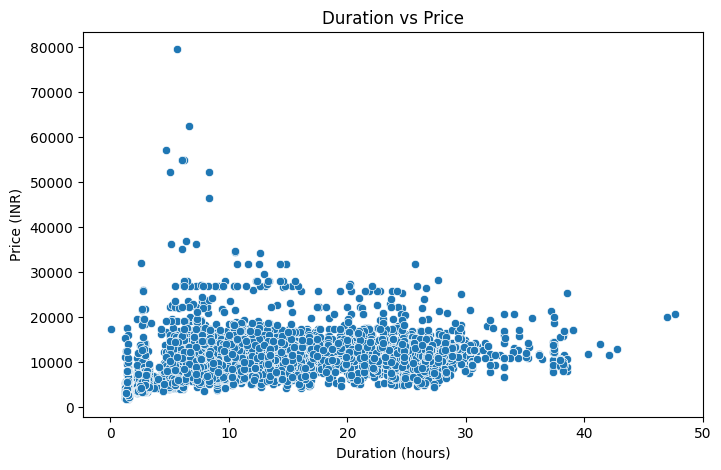

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration_hours', y='Price', data=df)
plt.title('Duration vs Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price (INR)')
plt.show()


Here there is a moderate relation is observable between price and duration. Because a flight which takes 30 hours have an average price in range of 10k to 20k. where as flights which have 7 hours of duration have highest price around 65k.

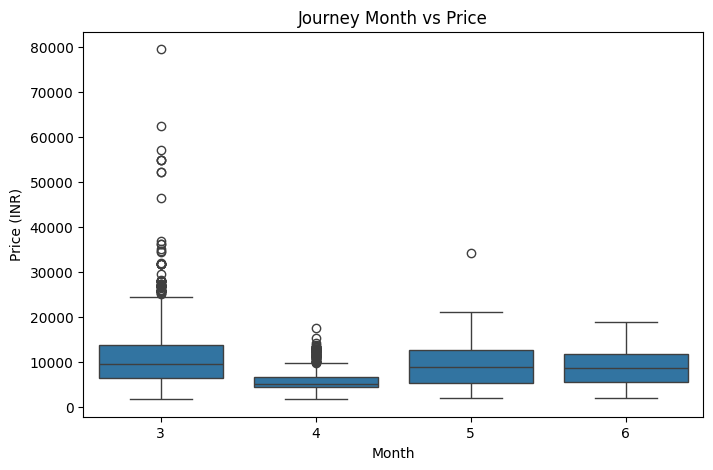

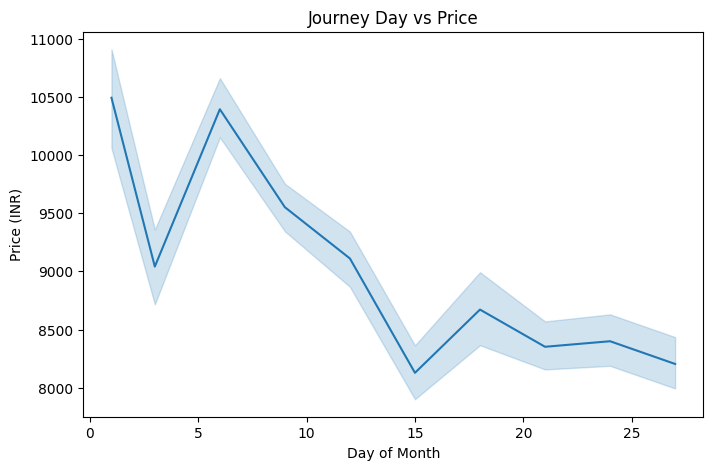

In [ ]:
df['Dep_year'] = df['Date_of_Journey'].dt.year
df['Dep_Month'] = df['Date_of_Journey'].dt.month
df['Dep_Day'] = df['Date_of_Journey'].dt.day
df['date_of_week_D'] = df['Date_of_Journey'].dt.dayofweek
df['is_weekend_D'] = (df['date_of_week_D'] >= 5).astype(int)

plt.figure(figsize=(8,5))
sns.boxplot(x='Dep_Month', y='Price', data=df)
plt.title('Journey Month vs Price')
plt.xlabel('Month')
plt.ylabel('Price (INR)')
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(x='Dep_Day', y='Price', data=df)
plt.title('Journey Day vs Price')
plt.xlabel('Day of Month')
plt.ylabel('Price (INR)')
plt.show()


**Box plot**

The above box plot shows a surge in demand  of flights and it's refelects in the prices. In 3rd month we can see a huge rise of ticket prices where as in 4th month we can see a bottom line where as for 5th and 6th month there is a study demand and prices varies between 3k to 25k.

**Line plot**

We can see the prices of flight tickets at the begining of the month become sky rocket and reaches around 10k where as as it's declined timely and at the end of the month it reaches in range of 8k to 8.5k.

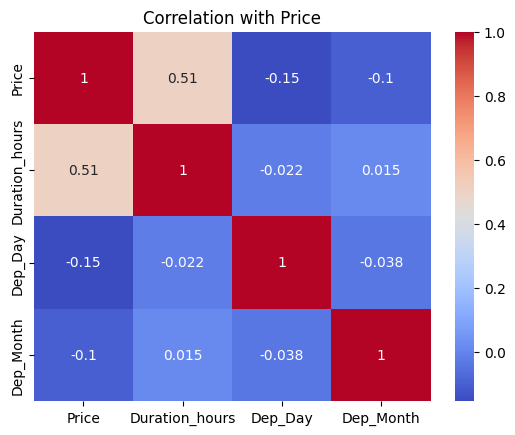

In [ ]:
corr = df[['Price', 'Duration_hours', 'Dep_Day', 'Dep_Month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()


'Airline','Date_of_Journey','Source','Destination','Additional_Info'

In [ ]:
print(df['Source'].value_counts())
print(df['Destination'].value_counts())

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64
Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


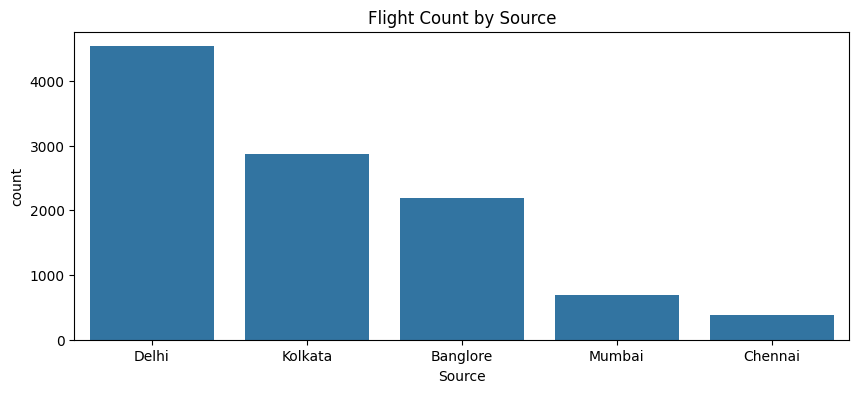

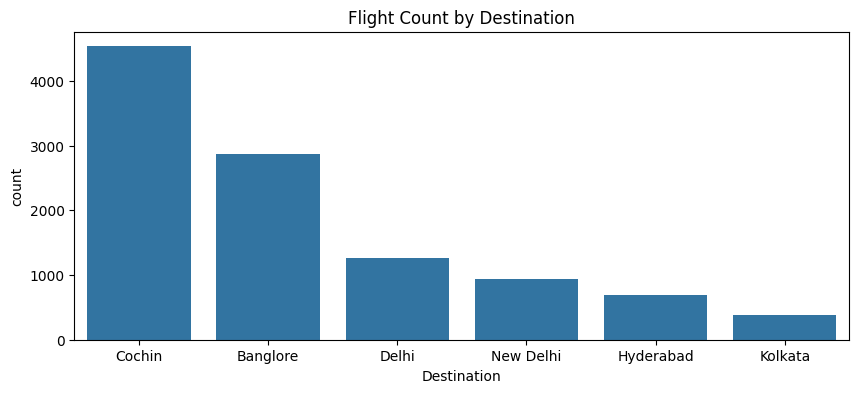

In [ ]:

plt.figure(figsize=(10,4))
sns.countplot(x='Source', data=df, order=df['Source'].value_counts().index)
plt.title('Flight Count by Source')
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='Destination', data=df, order=df['Destination'].value_counts().index)
plt.title('Flight Count by Destination')
plt.show()

In [ ]:
print(df['Price'].mean())
display(df.groupby('Source')['Price'].mean())
display(df.groupby('Destination')['Price'].mean())

9087.21456656057


,Price
Source,
Banglore,8017.464269
Chennai,4789.892388
Delhi,10540.113536
Kolkata,9158.389411
Mumbai,5059.708752


,Price
Destination,
Banglore,9158.389411
Cochin,10540.113536
Delhi,5143.918577
Hyderabad,5059.708752
Kolkata,4789.892388
New Delhi,11917.716738


In [ ]:
route_price = df.groupby('Route')['Price'].mean().sort_values(ascending=False)
print(route_price.head(10))  # Top 10 expensive routes
print(route_price.tail(10))

Route
BOM → DED → DEL → HYD                24115.000000
BOM → JDH → DEL → HYD                23867.000000
BOM → VNS → DEL → HYD                23528.000000
BOM → UDR → DEL → HYD                22950.000000
BOM → BDQ → DEL → HYD                22792.500000
DEL → DED → BOM → COK                19539.500000
DEL → IXU → BOM → COK                19381.333333
BOM → JDH → JAI → DEL → HYD          18293.000000
BOM → JAI → DEL → HYD                17926.000000
BLR → CCU → BBI → HYD → VGA → DEL    17686.000000
Name: Price, dtype: float64
Route
CCU → BBI → HYD → BLR    5790.333333
BLR → STV → DEL          5746.000000
DEL → AMD → COK          5606.200000
BLR → DEL                5561.114691
CCU → MAA → BLR          5240.876923
CCU → HYD → BLR          4910.018868
MAA → CCU                4789.892388
CCU → BLR                4556.055249
BOM → NDC → HYD          4140.000000
BOM → HYD                3932.809984
Name: Price, dtype: float64


<h2>

**Checking imbalance data in Additional_Info**

</h2>

In [ ]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [ ]:
print(df['Price'].mean())
df.groupby('Additional_Info')['Price'].mean()

9087.21456656057


,Price
Additional_Info,
1 Long layover,22109.631579
1 Short layover,26743.000000
2 Long layover,26480.000000
Business class,56811.250000
Change airports,16800.714286
In-flight meal not included,9471.834511
No Info,8044.666667
No check-in baggage included,3645.156250
No info,9141.519295


In [ ]:
counts = df['Additional_Info'].value_counts()
rare = counts[counts < 50].index
df['Additional_Info'] = df['Additional_Info'].replace(rare, 'Other')
df['Additional_Info'] = df['Additional_Info'].str.lower().str.strip()

In [ ]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
no info,8344
in-flight meal not included,1982
no check-in baggage included,320
other,36


In [ ]:
print(df['Price'].mean())
df.groupby('Additional_Info')['Price'].mean()

9087.21456656057


,Price
Additional_Info,
in-flight meal not included,9471.834511
no check-in baggage included,3645.156250
no info,9141.519295
other,23698.972222


Additional_Info column contains imbalance data so we tried to make it some balance and we combine rare categories and create a category called other which making the balance of the data. Later Additional_Info is converted into lower case because some values have "No Info" and some have "No info".

<h2>

**Checking Imbalance data in Airline**

</h2>

In [ ]:
print(df['Airline'].value_counts())

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


In [ ]:
print(df['Price'].median())
df.groupby('Airline')['Price'].median()

8372.0


,Price
Airline,
Air Asia,5162.0
Air India,9443.0
GoAir,5135.0
IndiGo,5000.0
Jet Airways,11467.0
Jet Airways Business,54747.0
Multiple carriers,10197.0
Multiple carriers Premium economy,11269.0
SpiceJet,3873.0


In [ ]:
threshold = df['Price'].median()

df['Class'] = ['Budget' if price <= threshold else 'Premium' for price in df['Price']]
print(df['Class'].value_counts())

Class
Budget     5369
Premium    5313
Name: count, dtype: int64


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Dep_year,Dep_Month,Dep_Day,date_of_week_D,is_weekend_D,Class
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,no info,3897,2.833333,2019,3,24,6,1,Budget
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,no info,7662,7.416667,2019,5,1,2,0,Budget
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,no info,13882,19.000000,2019,6,9,6,1,Premium
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,no info,6218,5.416667,2019,5,12,6,1,Budget
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,no info,13302,4.750000,2019,3,1,4,0,Premium


correlation heatmap showing the relationship between the variable 'Price' and other features: 'Duration_hours', 'Journey_Day', and 'Journey_Month'.What the Heatmap ShowsEach cell shows the correlation coefficient between two variables, ranging from -1 (strong negative relationship) to +1 (strong positive relationship).

For example, 'Price' is moderately positively correlated with 'Duration_hours' (0.51), meaning journeys with longer duration tend to have higher prices.'Journey_Day' and 'Journey_Month' show weak negative correlations with 'Price' (-0.15 and -0.10, respectively), suggesting very little relationship between these features and price.

<h1> Task-02</h1>

**<h3>Creation of machine learning model</h3>**


---



**Feature Engineering**

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Dep_year,Dep_Month,Dep_Day,date_of_week_D,is_weekend_D,Class
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,no info,3897,2.833333,2019,3,24,6,1,Budget
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,no info,7662,7.416667,2019,5,1,2,0,Budget
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,no info,13882,19.000000,2019,6,9,6,1,Premium
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,no info,6218,5.416667,2019,5,12,6,1,Budget
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,no info,13302,4.750000,2019,3,1,4,0,Premium


**Train Test Split**

Now we have converted date into different integer columns to help our model to understand the pattern in the date trend. So now we can remove date_of_journey from our labels

In [ ]:
df["route_stops"] = df["Route"].str.split(" → ")
display(df.head())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Dep_year,Dep_Month,Dep_Day,date_of_week_D,is_weekend_D,Class,route_stops
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,no info,3897,2.833333,2019,3,24,6,1,Budget,"[BLR, DEL]"
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,no info,7662,7.416667,2019,5,1,2,0,Budget,"[CCU, IXR, BBI, BLR]"
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,no info,13882,19.000000,2019,6,9,6,1,Premium,"[DEL, LKO, BOM, COK]"
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,no info,6218,5.416667,2019,5,12,6,1,Budget,"[CCU, NAG, BLR]"
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,no info,13302,4.750000,2019,3,1,4,0,Premium,"[BLR, NAG, DEL]"


In [ ]:
# arrival time

def extract_arrival_datetime(row):
    arrival = row['Arrival_Time']
    journey_date = row['Date_of_Journey']

    # Check if arrival time contains a date (format: "HH:MM DD Mon")
    parts = arrival.split(' ')
    if len(parts) == 3:  # Has time and date parts
        time_str = parts[0]
        date_str = parts[1] + ' ' + parts[2]
        arrival_date = pd.to_datetime(date_str + ' ' + str(journey_date.year), format='%d %b %Y')
    else:
        time_str = arrival
        arrival_date = journey_date  # Same day

    # Combine arrival date and time
    arrival_datetime = pd.to_datetime(arrival_date.strftime('%Y-%m-%d') + ' ' + time_str, format='%Y-%m-%d %H:%M')
    return arrival_datetime

df['Arrival_DateTime'] = df.apply(extract_arrival_datetime, axis=1)


In [ ]:
df['Arrival_year'] = df['Arrival_DateTime'].dt.year
df['Arrival_Month'] = df['Arrival_DateTime'].dt.month
df['Arrival_Day'] = df['Arrival_DateTime'].dt.day
df['date_of_week_A'] = df['Arrival_DateTime'].dt.dayofweek
df['is_weekend_A'] = (df['date_of_week_A'] >= 5).astype(int)

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,date_of_week_D,is_weekend_D,Class,route_stops,Arrival_DateTime,Arrival_year,Arrival_Month,Arrival_Day,date_of_week_A,is_weekend_A
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,no info,...,6,1,Budget,"[BLR, DEL]",2019-03-22 01:10:00,2019,3,22,4,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,no info,...,2,0,Budget,"[CCU, IXR, BBI, BLR]",2019-05-01 13:15:00,2019,5,1,2,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,no info,...,6,1,Premium,"[DEL, LKO, BOM, COK]",2019-06-10 04:25:00,2019,6,10,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,no info,...,6,1,Budget,"[CCU, NAG, BLR]",2019-05-12 23:30:00,2019,5,12,6,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,no info,...,4,0,Premium,"[BLR, NAG, DEL]",2019-03-01 21:35:00,2019,3,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,no info,...,1,0,Budget,"[CCU, BLR]",2019-04-09 22:25:00,2019,4,9,1,0
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,no info,...,5,1,Budget,"[CCU, BLR]",2019-04-27 23:20:00,2019,4,27,5,1
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,no info,...,5,1,Budget,"[BLR, DEL]",2019-04-27 11:20:00,2019,4,27,5,1
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,no info,...,4,0,Premium,"[BLR, DEL]",2019-03-01 14:10:00,2019,3,1,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  object        
 1   Date_of_Journey   10682 non-null  datetime64[ns]
 2   Source            10682 non-null  object        
 3   Destination       10682 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10682 non-null  object        
 6   Arrival_Time      10682 non-null  object        
 7   Duration          10682 non-null  object        
 8   Total_Stops       10682 non-null  object        
 9   Additional_Info   10682 non-null  object        
 10  Price             10682 non-null  int64         
 11  Duration_hours    10682 non-null  float64       
 12  Dep_year          10682 non-null  int32         
 13  Dep_Month         10682 non-null  int32         
 14  Dep_Day           10682 non

In [ ]:
import numpy as np

def extract_stops(stop_str):
    if stop_str == 'non-stop':
        return 0
    else:
        # Extract digits from string, e.g., "2 stops" → 2
        import re
        match = re.search(r'(\d+)', stop_str)
        if match:
            return int(match.group(1))
        else:
            return np.nan  # or a default value if format is unexpected

df['Total_Stops'] = df['Total_Stops'].apply(extract_stops)

In [ ]:
df['Arrival_Time'] = df['Arrival_DateTime'].dt.time
df['Arrival_Date'] = df['Arrival_DateTime'].dt.date
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,is_weekend_D,Class,route_stops,Arrival_DateTime,Arrival_year,Arrival_Month,Arrival_Day,date_of_week_A,is_weekend_A,Arrival_Date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,0,no info,...,1,Budget,"[BLR, DEL]",2019-03-22 01:10:00,2019,3,22,4,0,2019-03-22
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,2,no info,...,0,Budget,"[CCU, IXR, BBI, BLR]",2019-05-01 13:15:00,2019,5,1,2,0,2019-05-01
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,2,no info,...,1,Premium,"[DEL, LKO, BOM, COK]",2019-06-10 04:25:00,2019,6,10,0,0,2019-06-10
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,1,no info,...,1,Budget,"[CCU, NAG, BLR]",2019-05-12 23:30:00,2019,5,12,6,1,2019-05-12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,1,no info,...,0,Premium,"[BLR, NAG, DEL]",2019-03-01 21:35:00,2019,3,1,4,0,2019-03-01


In [ ]:
# df['Additional_Info'].value_counts()

In [ ]:
# print(df['Price'].mean())
# df.groupby('Additional_Info')['Price'].mean()

In [ ]:
# counts = df['Additional_Info'].value_counts()
# rare = counts[counts < 50].index
# df['Additional_Info'] = df['Additional_Info'].replace(rare, 'Other')
# df['Additional_Info'] = df['Additional_Info'].str.lower().str.strip()

In [ ]:
# df['Additional_Info'].value_counts()

In [ ]:
# print(df['Price'].mean())
# df.groupby('Additional_Info')['Price'].mean()

Additional_Info column contains imbalance data so we tried to make it some balance and we combine rare categories and create a category called other which making the balance of the data. Later Additional_Info is converted into lower case because some values have "No Info" and some have "No info".

In [ ]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M:%S')

df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  object        
 1   Date_of_Journey   10682 non-null  datetime64[ns]
 2   Source            10682 non-null  object        
 3   Destination       10682 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10682 non-null  datetime64[ns]
 6   Arrival_Time      10682 non-null  datetime64[ns]
 7   Duration          10682 non-null  object        
 8   Total_Stops       10682 non-null  int64         
 9   Additional_Info   10682 non-null  object        
 10  Price             10682 non-null  int64         
 11  Duration_hours    10682 non-null  float64       
 12  Dep_year          10682 non-null  int32         
 13  Dep_Month         10682 non-null  int32         
 14  Dep_Day           10682 non

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Dep_year,Dep_Month,Dep_Day,date_of_week_D,is_weekend_D,Class,route_stops,Arrival_DateTime,Arrival_year,Arrival_Month,Arrival_Day,date_of_week_A,is_weekend_A,Arrival_Date,Dep_Hour,Arrival_Hour
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,2h 50m,0,no info,3897,2.833333,2019,3,24,6,1,Budget,"[BLR, DEL]",2019-03-22 01:10:00,2019,3,22,4,0,2019-03-22,22,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2,no info,7662,7.416667,2019,5,1,2,0,Budget,"[CCU, IXR, BBI, BLR]",2019-05-01 13:15:00,2019,5,1,2,0,2019-05-01,5,13
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19h,2,no info,13882,19.000000,2019,6,9,6,1,Premium,"[DEL, LKO, BOM, COK]",2019-06-10 04:25:00,2019,6,10,0,0,2019-06-10,9,4
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1,no info,6218,5.416667,2019,5,12,6,1,Budget,"[CCU, NAG, BLR]",2019-05-12 23:30:00,2019,5,12,6,1,2019-05-12,18,23
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1,no info,13302,4.750000,2019,3,1,4,0,Premium,"[BLR, NAG, DEL]",2019-03-01 21:35:00,2019,3,1,4,0,2019-03-01,16,21


<h3>

**Generating Box and hisplot for data distribution and outlier detection**   

</h3>

In [ ]:
num_col = df.select_dtypes(include='int')

In [ ]:
display(num_col)

,Total_Stops,Price,Dep_year,Dep_Month,Dep_Day,date_of_week_D,is_weekend_D,Arrival_year,Arrival_Month,Arrival_Day,date_of_week_A,is_weekend_A,Dep_Hour,Arrival_Hour
0,0,3897,2019,3,24,6,1,2019,3,22,4,0,22,1
1,2,7662,2019,5,1,2,0,2019,5,1,2,0,5,13
2,2,13882,2019,6,9,6,1,2019,6,10,0,0,9,4
3,1,6218,2019,5,12,6,1,2019,5,12,6,1,18,23
4,1,13302,2019,3,1,4,0,2019,3,1,4,0,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,2019,4,9,1,0,2019,4,9,1,0,19,22
10679,0,4145,2019,4,27,5,1,2019,4,27,5,1,20,23
10680,0,7229,2019,4,27,5,1,2019,4,27,5,1,8,11
10681,0,12648,2019,3,1,4,0,2019,3,1,4,0,11,14


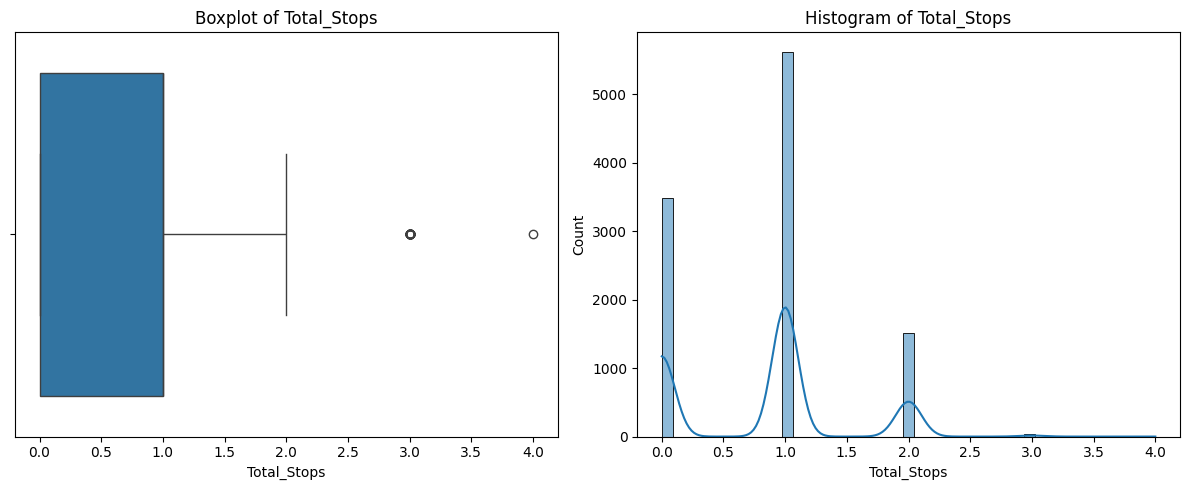

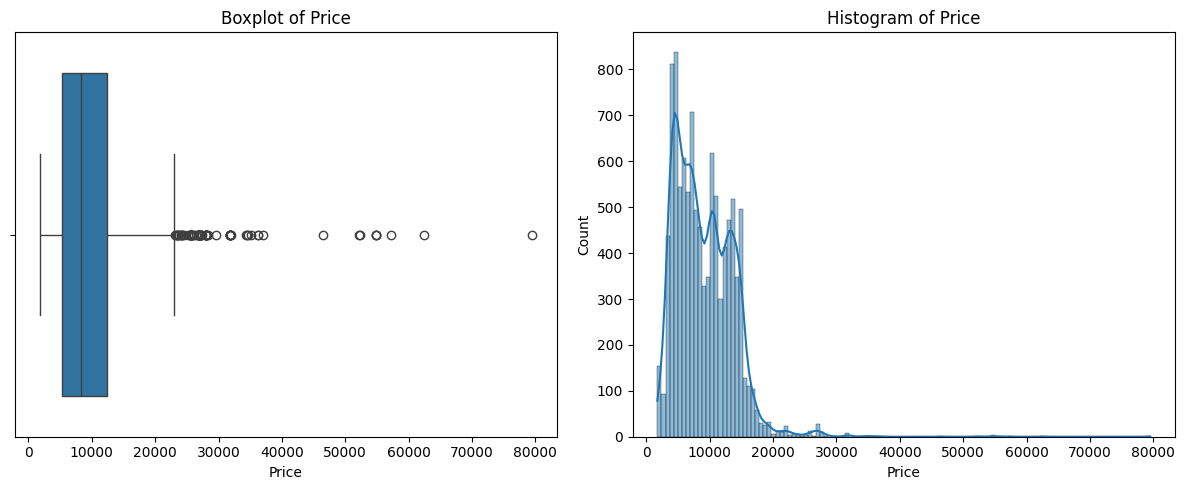

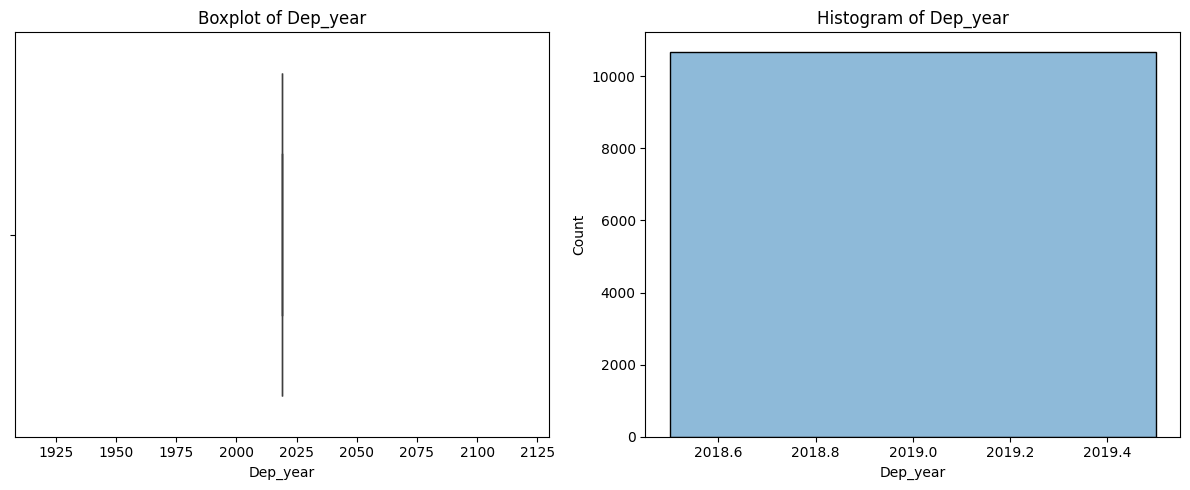

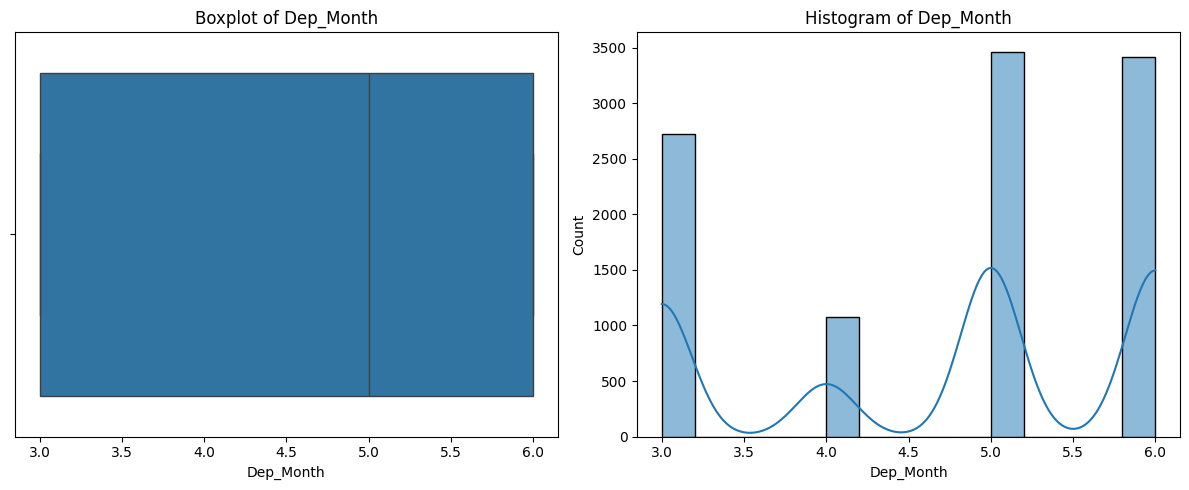

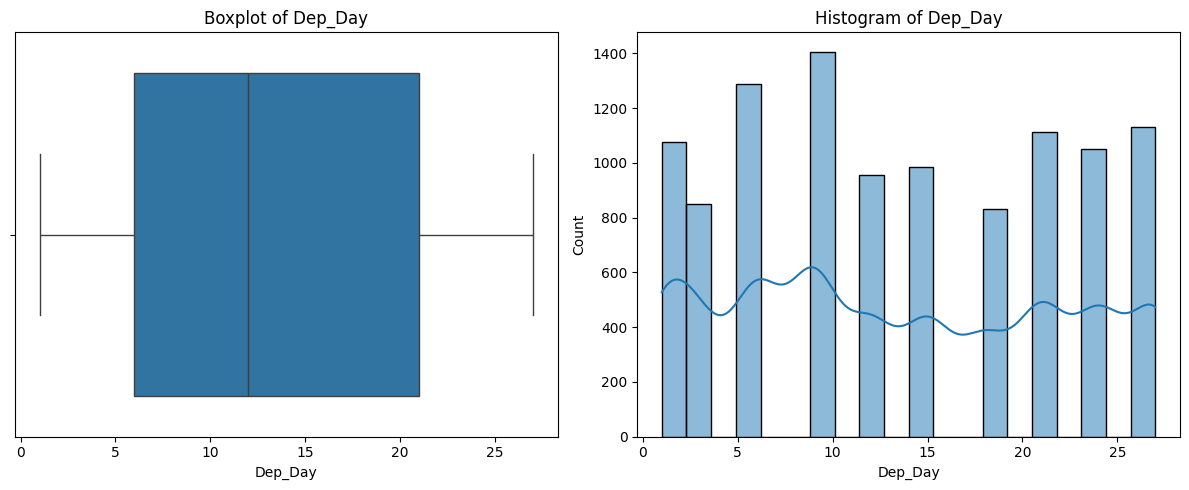

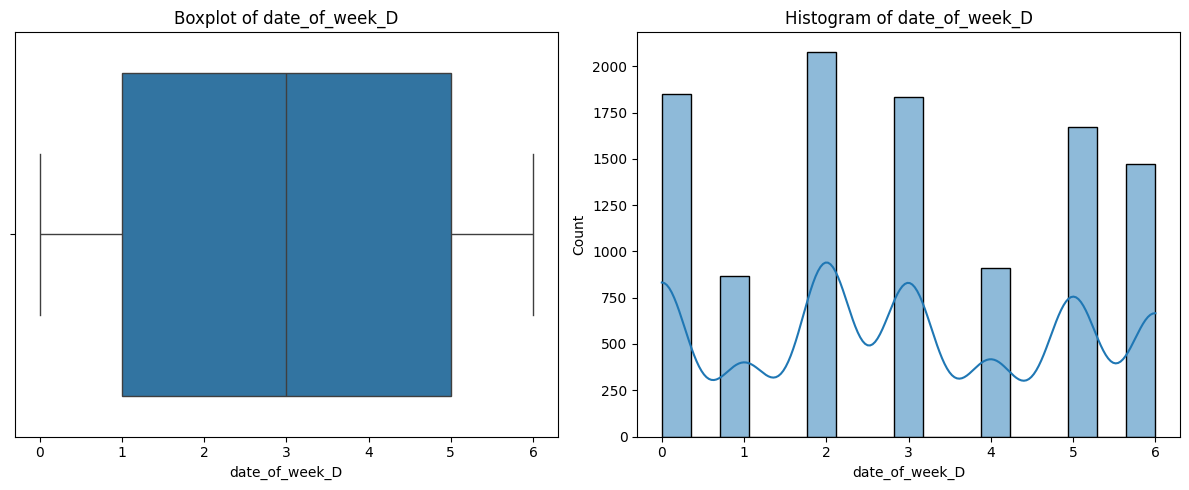

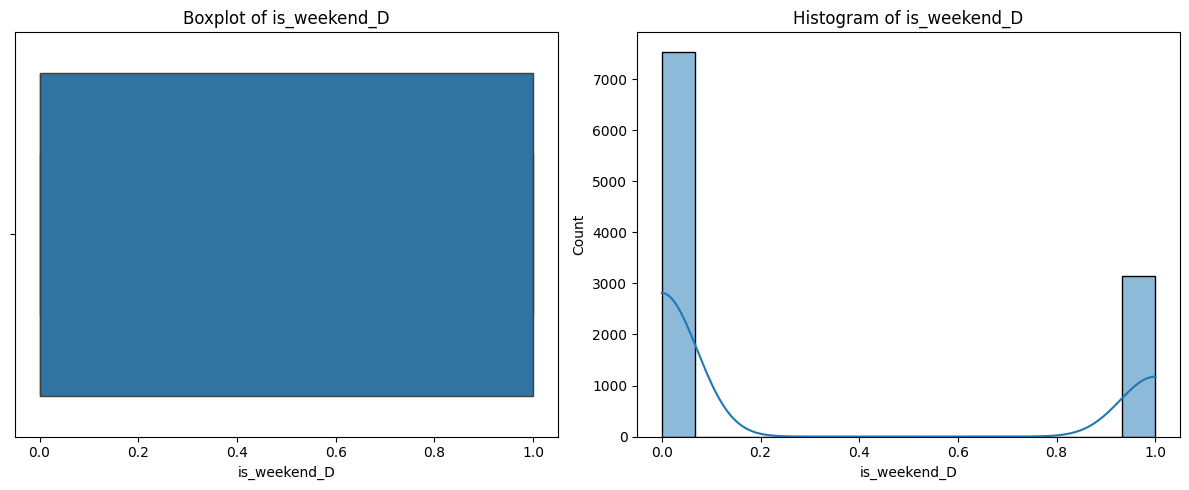

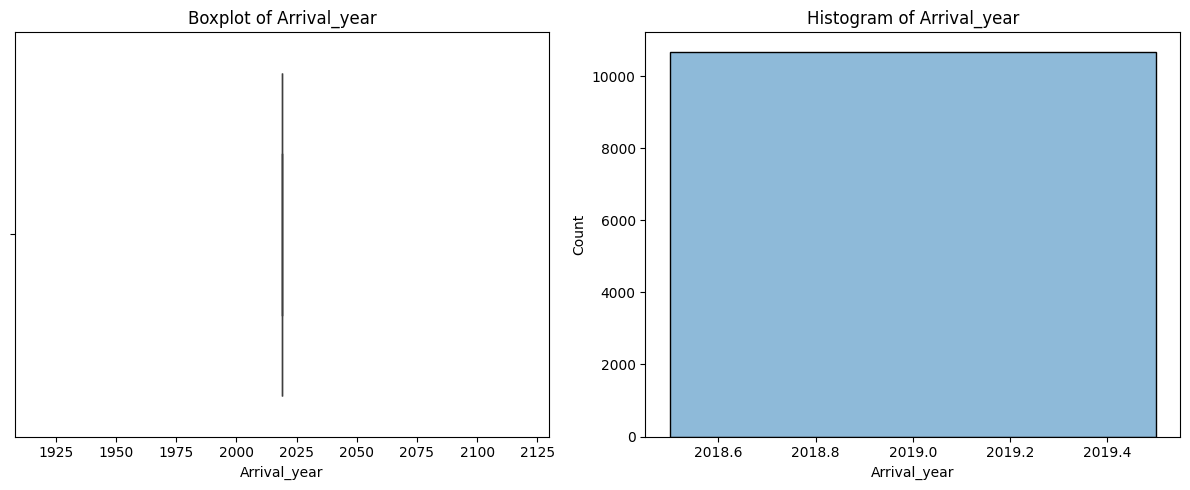

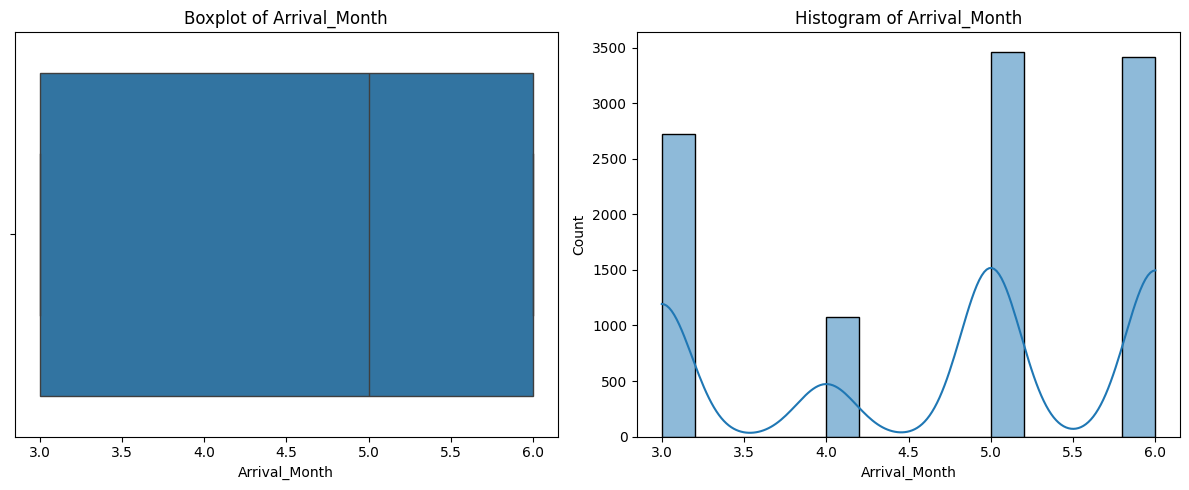

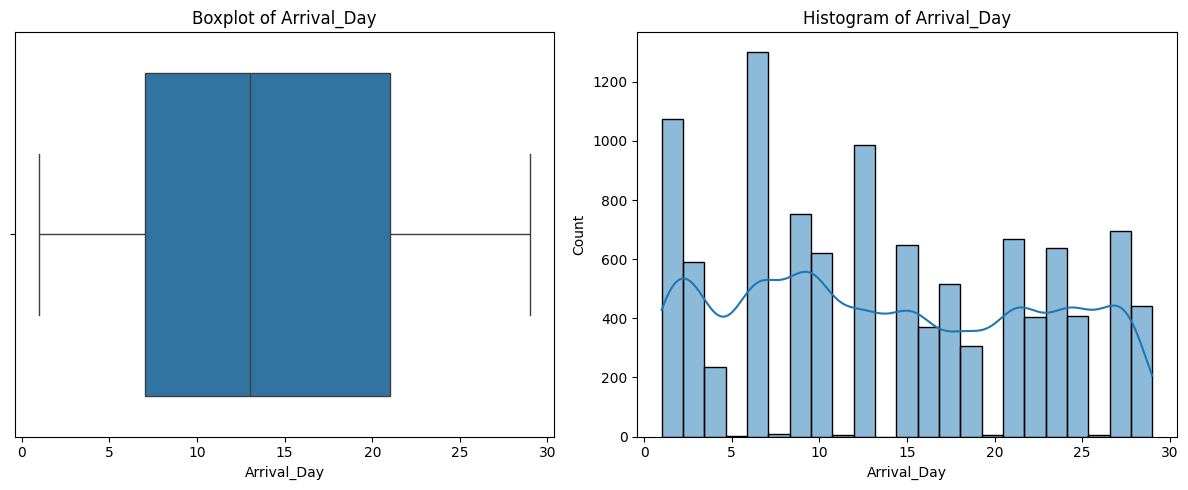

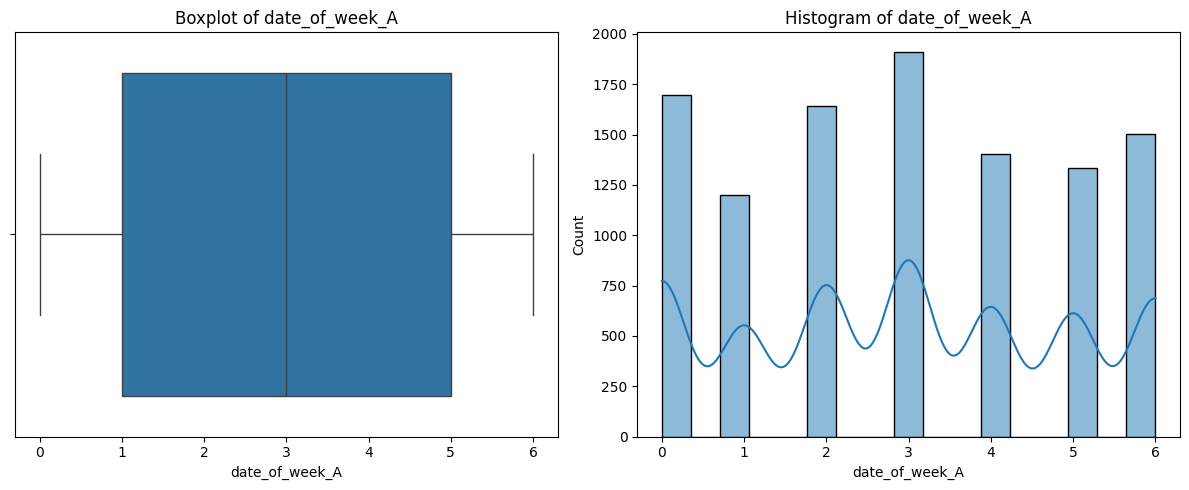

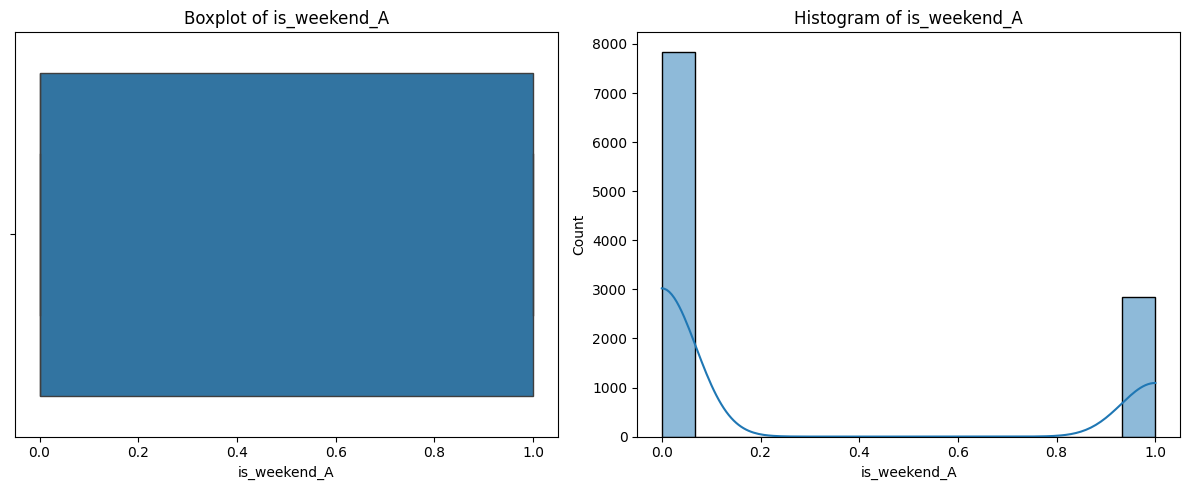

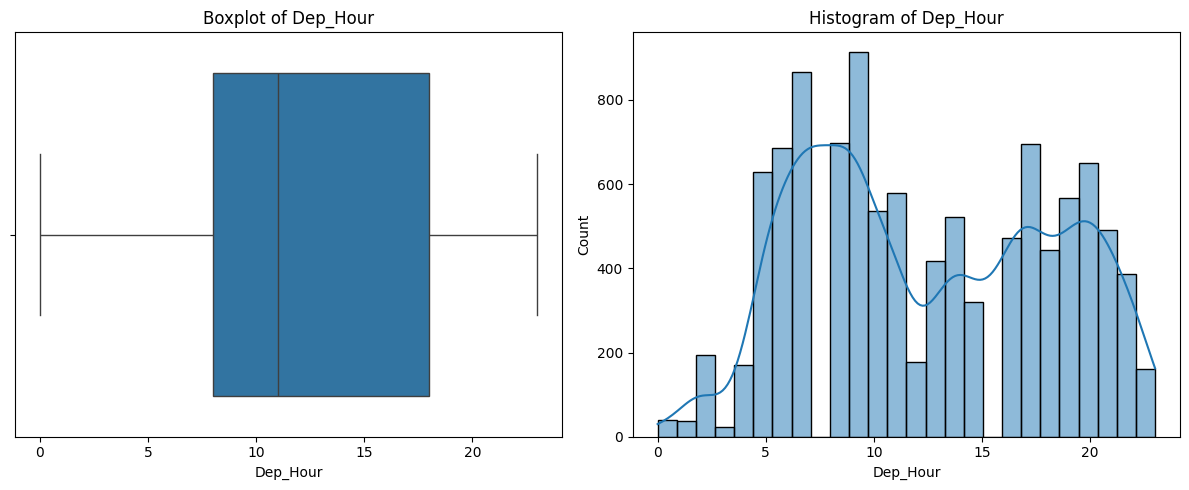

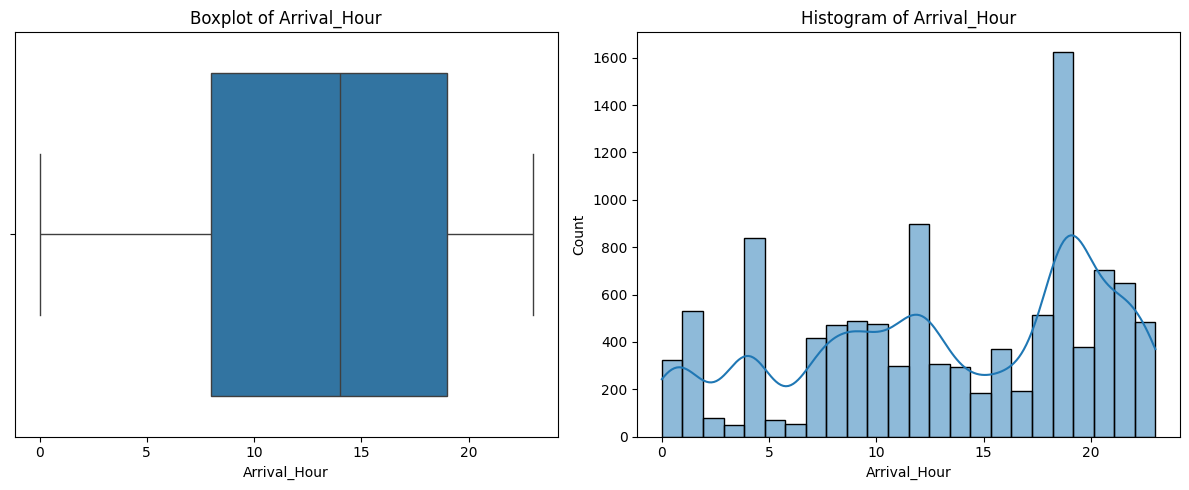

In [ ]:
for num in num_col:
  plt.figure(figsize=(12,5))

  plt.subplot(1,2,1)
  sns.boxplot(x=df[num])
  plt.title(f'Boxplot of {num}')


  plt.subplot(1,2,2)
  sns.histplot(df[num],kde=True)
  plt.title(f'Histogram of {num}')


  plt.tight_layout()
  plt.show()

<h1>
Model Building

</h1>

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# 1. Drop unneeded datetime/object columns
cols_to_drop = ["Date_of_Journey","Dep_Time","Arrival_Time","Duration","Arrival_DateTime","Arrival_Date","Price"]
X = df.drop(columns=cols_to_drop, axis=1)
y = df['Price']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Handle route_stops if it's a list
X_train['route_stops'] = X_train['route_stops'].apply(lambda x: len(x) if isinstance(x, list) else int(x))
X_test['route_stops'] = X_test['route_stops'].apply(lambda x: len(x) if isinstance(x, list) else int(x))

# 4. Target encoding
target_enc_cols = ['Airline', 'Source', 'Destination','Route']
te = TargetEncoder(cols=target_enc_cols)
X_train[target_enc_cols] = te.fit_transform(X_train[target_enc_cols], y_train)
X_test[target_enc_cols] = te.transform(X_test[target_enc_cols])

# 5. Label encoding
label_enc_cols = ['Total_Stops', 'Additional_Info', 'Class']
for col in label_enc_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# 6. Confirm all numeric
print(X_train.dtypes)


Airline            float64
Source             float64
Destination        float64
Route              float64
Total_Stops          int64
Additional_Info      int64
Duration_hours     float64
Dep_year             int32
Dep_Month            int32
Dep_Day              int32
date_of_week_D       int32
is_weekend_D         int64
Class                int64
route_stops          int64
Arrival_year         int32
Arrival_Month        int32
Arrival_Day          int32
date_of_week_A       int32
is_weekend_A         int64
Dep_Hour             int32
Arrival_Hour         int32
dtype: object


In [ ]:
te = TargetEncoder(cols=target_enc_cols)
X_train[target_enc_cols] = te.fit_transform(X_train[target_enc_cols], y_train)
X_test[target_enc_cols] = te.transform(X_test[target_enc_cols])

In [ ]:
from sklearn.preprocessing import FunctionTransformer
identity = FunctionTransformer(lambda x: x)

pipeline = Pipeline([
    ('preprocess', identity),
    ('model', RandomForestRegressor())
])

Grid Search for best model & hyperparameters | Model Selection

In [ ]:
param_grid = [
    {
        'model': [RandomForestRegressor(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    },
    {
        'model': [XGBRegressor(objective='reg:squarederror', random_state=42)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6, 10],
        'model__learning_rate': [0.01, 0.1]
    },
    {
        'model': [AdaBoostRegressor(random_state=42)],
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1, 1.0]
    }
]

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FunctionTransformer(func=<function <lambda> at 0x7aa4471b8fe0>)),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestRegressor(random_state=42)],
                          'model__max_depth': [None, 10, 20],
                          'model__n_estimators': [100, 200]},
                         {'model': [XGBRegressor(base_score=None, booster=None,
                                                 callb...
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None, ...)],
                          'model__learning_rate': [0.01, 0.1],
                          'model__max_depth': [3, 6, 10],
                          'model__n_estimators': [100, 200]},
                         {'model': [AdaBoostRegressor(random_state=42)],
                          'model__learning_rate': [0.01, 0.1, 1.0],
                          'model__n_estimators': [50, 100]}],
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
best_model = grid.best_estimator_
print(best_model)

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function <lambda> at 0x7aa4471b8fe0>)),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_we

In [ ]:
from sklearn.preprocessing import FunctionTransformer
identity = FunctionTransformer(lambda x: x)

pipeline = Pipeline([
    ('preprocess', identity),
    ('model', best_model)
])

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = best_model.predict(X_test)

# For older sklearn versions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Model:", grid.best_params_)
print("Test RMSE:", rmse)


Best Model: {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...), 'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 200}
Test RMSE: 1162.5662346722445


In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function <lambda> at 0x7aa4660a49a0>)),
                ('model',
                 Pipeline(steps=[('preprocess',
                                  FunctionTransformer(func=<function <lambda> at 0x7aa4471b8fe0>)),
                                 ('model',
                                  XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stoppi...
                                               feature_weights=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.1, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=6,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=200, n_jobs=None,
                                               num_parallel_tree=None, ...))]))])

In [ ]:
y_pre = pipeline.predict(X_test)

In [ ]:
y_pre

array([17096.9  ,  5655.311,  8748.432, ...,  6583.927,  9924.743,
       13170.205], dtype=float32)

<h1>
Model Evaluation
</h1>

---





**Mean squared error**

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1162.5662346722445


**Mean absolute error**

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 612.7099609375


**r2 score**

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.9373176693916321


**Mean Absolute Percentage Error**

In [ ]:
# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE (%):", mape)

MAPE (%): 6.983277000813112


<h1> Flight Fare Prediction Project – Challenges and Techniques </h1>

<h3>1. Missing Data

**Challenge:**

The dataset contained missing values in columns such as Total_Stops, Arrival_Time, and Price. Missing values can distort model training and reduce accuracy.

**Technique Used:**

**Imputation:**

For categorical columns like Total_Stops, used mode imputation (most frequent value).

For numerical columns like Price (if any missing), used mean or median imputation.

**Reason:**

Mode imputation preserves the most common category without introducing bias from outliers.

Mean/median imputation ensures numerical consistency without dropping valuable data.

<h3>2. Date-Time Features

Challenge:
Date_of_Journey, Dep_Time, Total_Stops and Arrival_Time were in string format. ML models cannot process raw datetime strings, and ignoring time features may reduce predictive power.

**Technique Used:**

Extracted day, month, hour, and minute from the date and time columns. And number from Total_Stops

Calculated flight duration as Arrival_Time – Dep_Time.

**Reason:**

Numerical features allow ML models to capture patterns in flight timing.

Duration is a critical factor affecting flight fares.

<h3>3. Categorical Variables

**Challenge:**

Columns like Airline, Source, Destination, and Route were categorical with multiple unique values. ML models cannot directly process text categories.

**Technique Used:**

Applied One-Hot Encoding for nominal categories (Airline, Source, Destination).

Used Label Encoding for ordinal categories if any.

**Reason:**

One-Hot Encoding avoids introducing ordinal bias.

Label Encoding is suitable for ordinal features where a hierarchy exists.

<h3>4. Outliers in Price

**Challenge:**

The Price column had extreme outliers (very high or very low fares) that could skew model predictions.

**Technique Used:**

Used IQR method to identify outliers and either capped them at upper/lower bounds or removed extreme cases.

**Reason:**

Prevents the model from being biased by rare extreme prices, improving generalization.

<h3>5. Feature Selection

**Challenge:**

The dataset had many columns, and some were irrelevant or highly correlated (Arrival_Time, Dep_Time --- etc). Including them might lead to overfitting.

**Technique Used:**

Correlation analysis and feature importance from tree-based models.

Dropped irrelevant features like Arrival_Time, Dep_Time and many o which had mostly “No info” values.

**Reason:**

Reduces dimensionality and avoids multicollinearity, improving model efficiency and accuracy.

<h3>6. Data Imbalance

**Challenge:**

Some airlines had far fewer flights than others, leading to imbalance in categorical representation.

**Technique Used:**

Used target encoding or weighted models to handle underrepresented categories.

**Reason:**

Prevents the model from being biased toward airlines with more samples.

<h3>7. Model Selection

**Challenge:**

Flight fare prediction is a regression problem with high non-linearity. Simple linear models may underperform.

**Technique Used:**

Tested multiple models: Random Forest Regressor, XGBoost, CatBoost, Gradient Boosting.

Performed hyperparameter tuning using GridSearchCV.

**Reason:**

Tree-based ensemble methods handle non-linear relationships, categorical variables, and outliers better than linear regression.

<h3>Conclusion</h3>

The project involved handling missing data, categorical encoding, outliers, and non-linear modeling challenges. By systematically preprocessing data and using robust regression models, the prediction accuracy was significantly improved.